In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

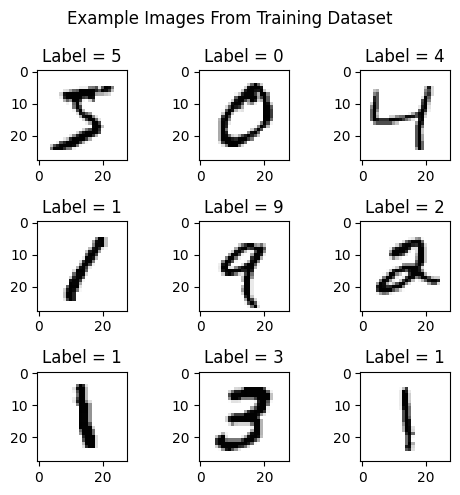

In [3]:
fig, axes = plt.subplots(3, 3, figsize=(5,5))
axes = axes.flatten()
for i in range(9):
  ax = axes[i]
  ax.imshow(X_train[i], cmap= plt.cm.binary)
  ax.set_title(f'Label = {y_train[i]}')
plt.suptitle('Example Images From Training Dataset')
plt.tight_layout()
plt.show()

In [4]:
def preprocess_data(X_train, X_test):
  IMG_SIZE = X_train[0].shape[0]
  X_train = tf.keras.utils.normalize(X_train, axis=1)
  X_test = tf.keras.utils.normalize(X_test, axis=1)
  X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
  X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
  return X_train, X_test

In [5]:
X_train, X_test = preprocess_data(X_train, X_test)

In [6]:
def CNN_model(input_shape):
  model = tf.keras.Sequential()
  ## First Convolution Layer
  model.add(tfl.Conv2D(filters = 64, kernel_size = 3, padding = 'same', input_shape= input_shape))
  model.add(tfl.Activation('relu'))
  model.add(tfl.MaxPooling2D(pool_size=(2,2)))
  ## Second Convolution Layer
  model.add(tfl.Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
  model.add(tfl.Activation('relu')) # (15,15,128)
  model.add(tfl.MaxPooling2D(pool_size=(2,2)))
  ## Third Convolution Layer
  model.add(tfl.Conv2D(filters = 256, kernel_size = 4, padding = 'valid'))
  model.add(tfl.Activation('relu'))
  model.add(tfl.MaxPooling2D(pool_size=(2,2)))
  # Flattening and Fully Connected Layers
  model.add(tfl.Flatten())
  model.add(tfl.Dense(400))
  model.add(tfl.Activation('relu'))
  model.add(tfl.Dense(120))
  model.add(tfl.Activation('relu'))
  model.add(tfl.Dense(10))
  model.add(tfl.Activation('softmax'))
  return model

In [7]:
model = CNN_model(input_shape = (28,28,1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                    

In [8]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']

In [9]:
model.compile(loss=loss, optimizer = opt, metrics = metrics)

In [10]:
history = model.fit(X_train, y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 14s 6ms/step - loss: 0.1560 - accuracy: 0.9512 - val_loss: 0.0628 - val_accuracy: 0.9818
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0481 - accuracy: 0.9855 - val_loss: 0.0433 - val_accuracy: 0.9879
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0316 - accuracy: 0.9908 - val_loss: 0.0429 - val_accuracy: 0.9882
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0446 - val_accuracy: 0.9881
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.0465 - val_accuracy: 0.9883


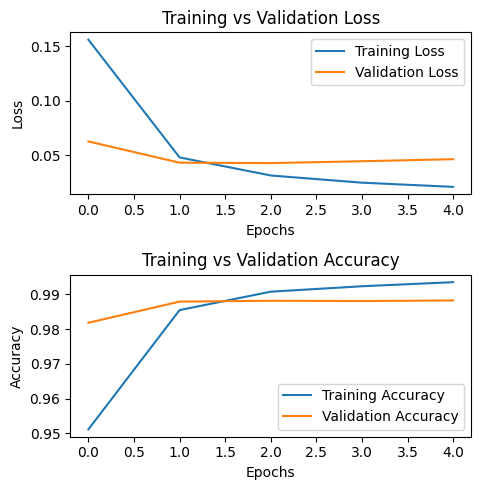

In [11]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
fig, axes = plt.subplots(2, 1, figsize=(5,5))
axes = axes.flatten()
axes[0].plot(training_loss)
axes[0].plot(val_loss)
axes[0].set_title('Training vs Validation Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend(['Training Loss', 'Validation Loss'])

axes[1].plot(training_accuracy)
axes[1].plot(val_accuracy)
axes[1].set_title('Training vs Validation Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(['Training Accuracy', 'Validation Accuracy'])

plt.tight_layout()
plt.show()


In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss = {test_loss}")
print(f"Test Accuracy = {round(test_accuracy*100,2)}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9893
Test Loss = 0.037252336740493774
Test Accuracy = 98.93%


In [13]:
def get_predictions(model, X_test):
  predictions = model.predict(X_test)
  predicted_labels = [np.argmax(predicted) for predicted in predictions]
  return predicted_labels

In [14]:
predicted_labels = get_predictions(model, X_test)

313/313 [==============================] - 1s 3ms/step


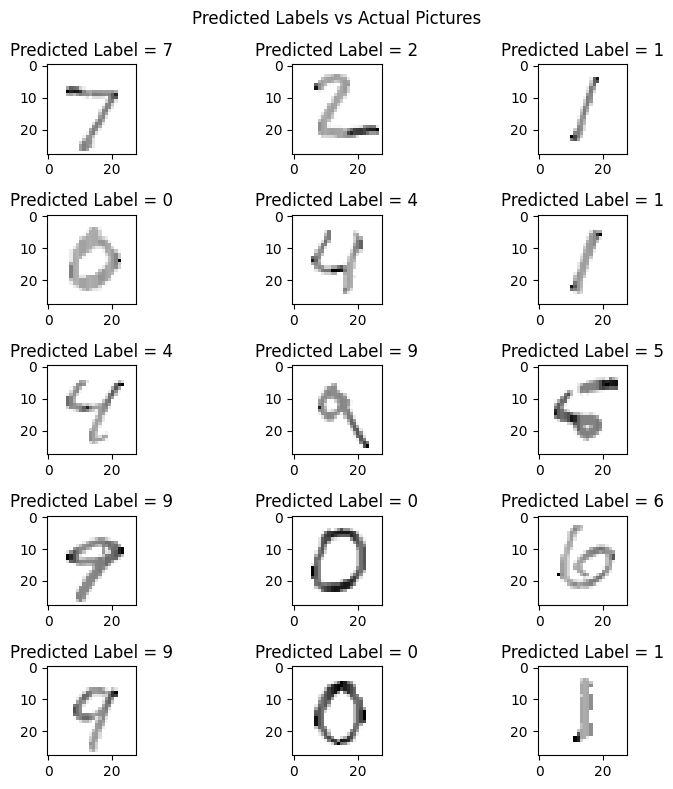

In [15]:
fig, axes = plt.subplots(5, 3, figsize=(8,8))
axes = axes.flatten()
for i in range(15):
  ax = axes[i]
  ax.imshow(X_test[i], cmap = plt.cm.binary)
  ax.set_title(f'Predicted Label = {predicted_labels[i]}')
plt.suptitle('Predicted Labels vs Actual Pictures')
plt.tight_layout()
plt.show()